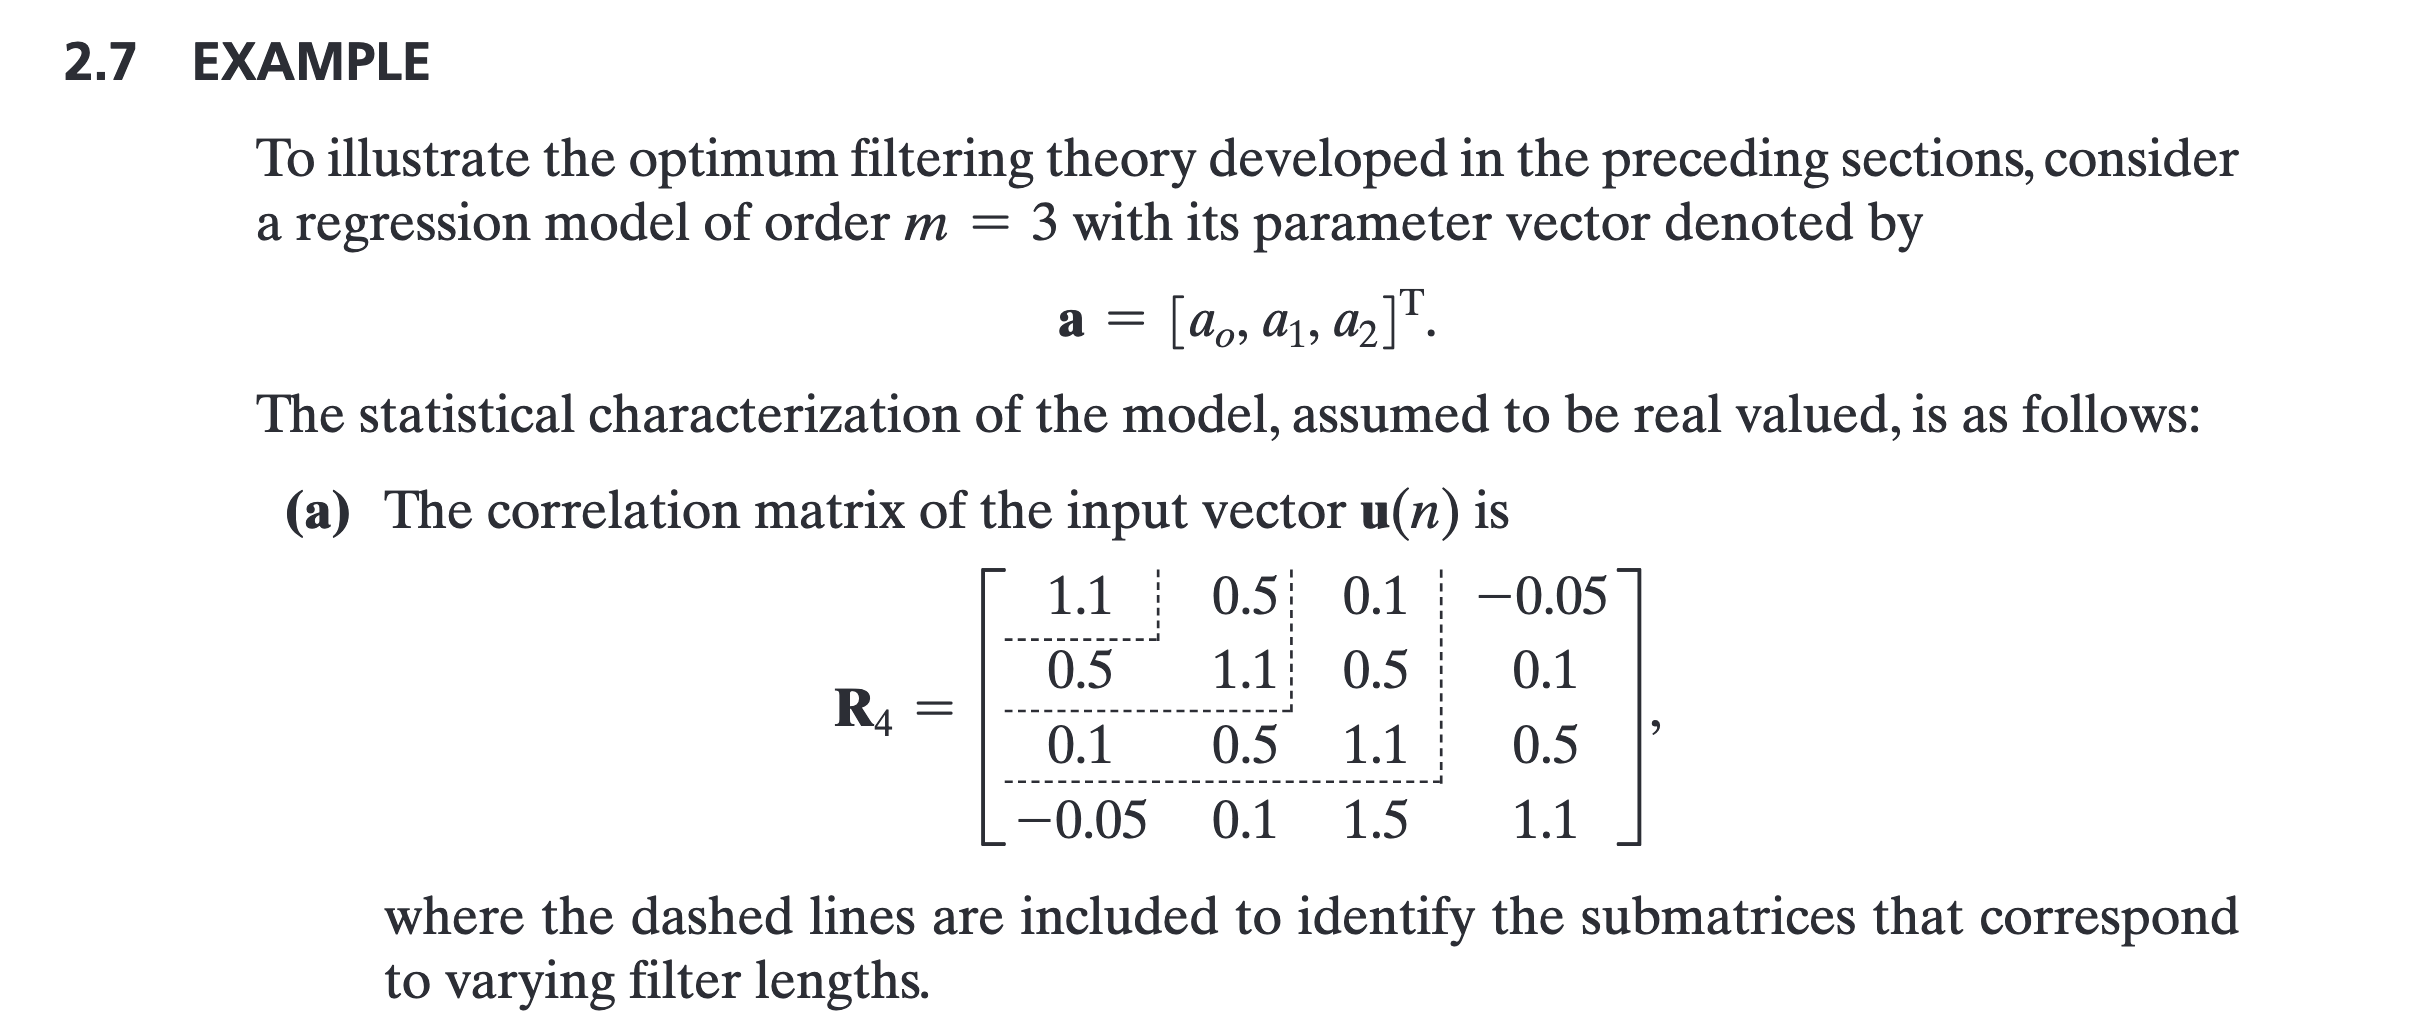

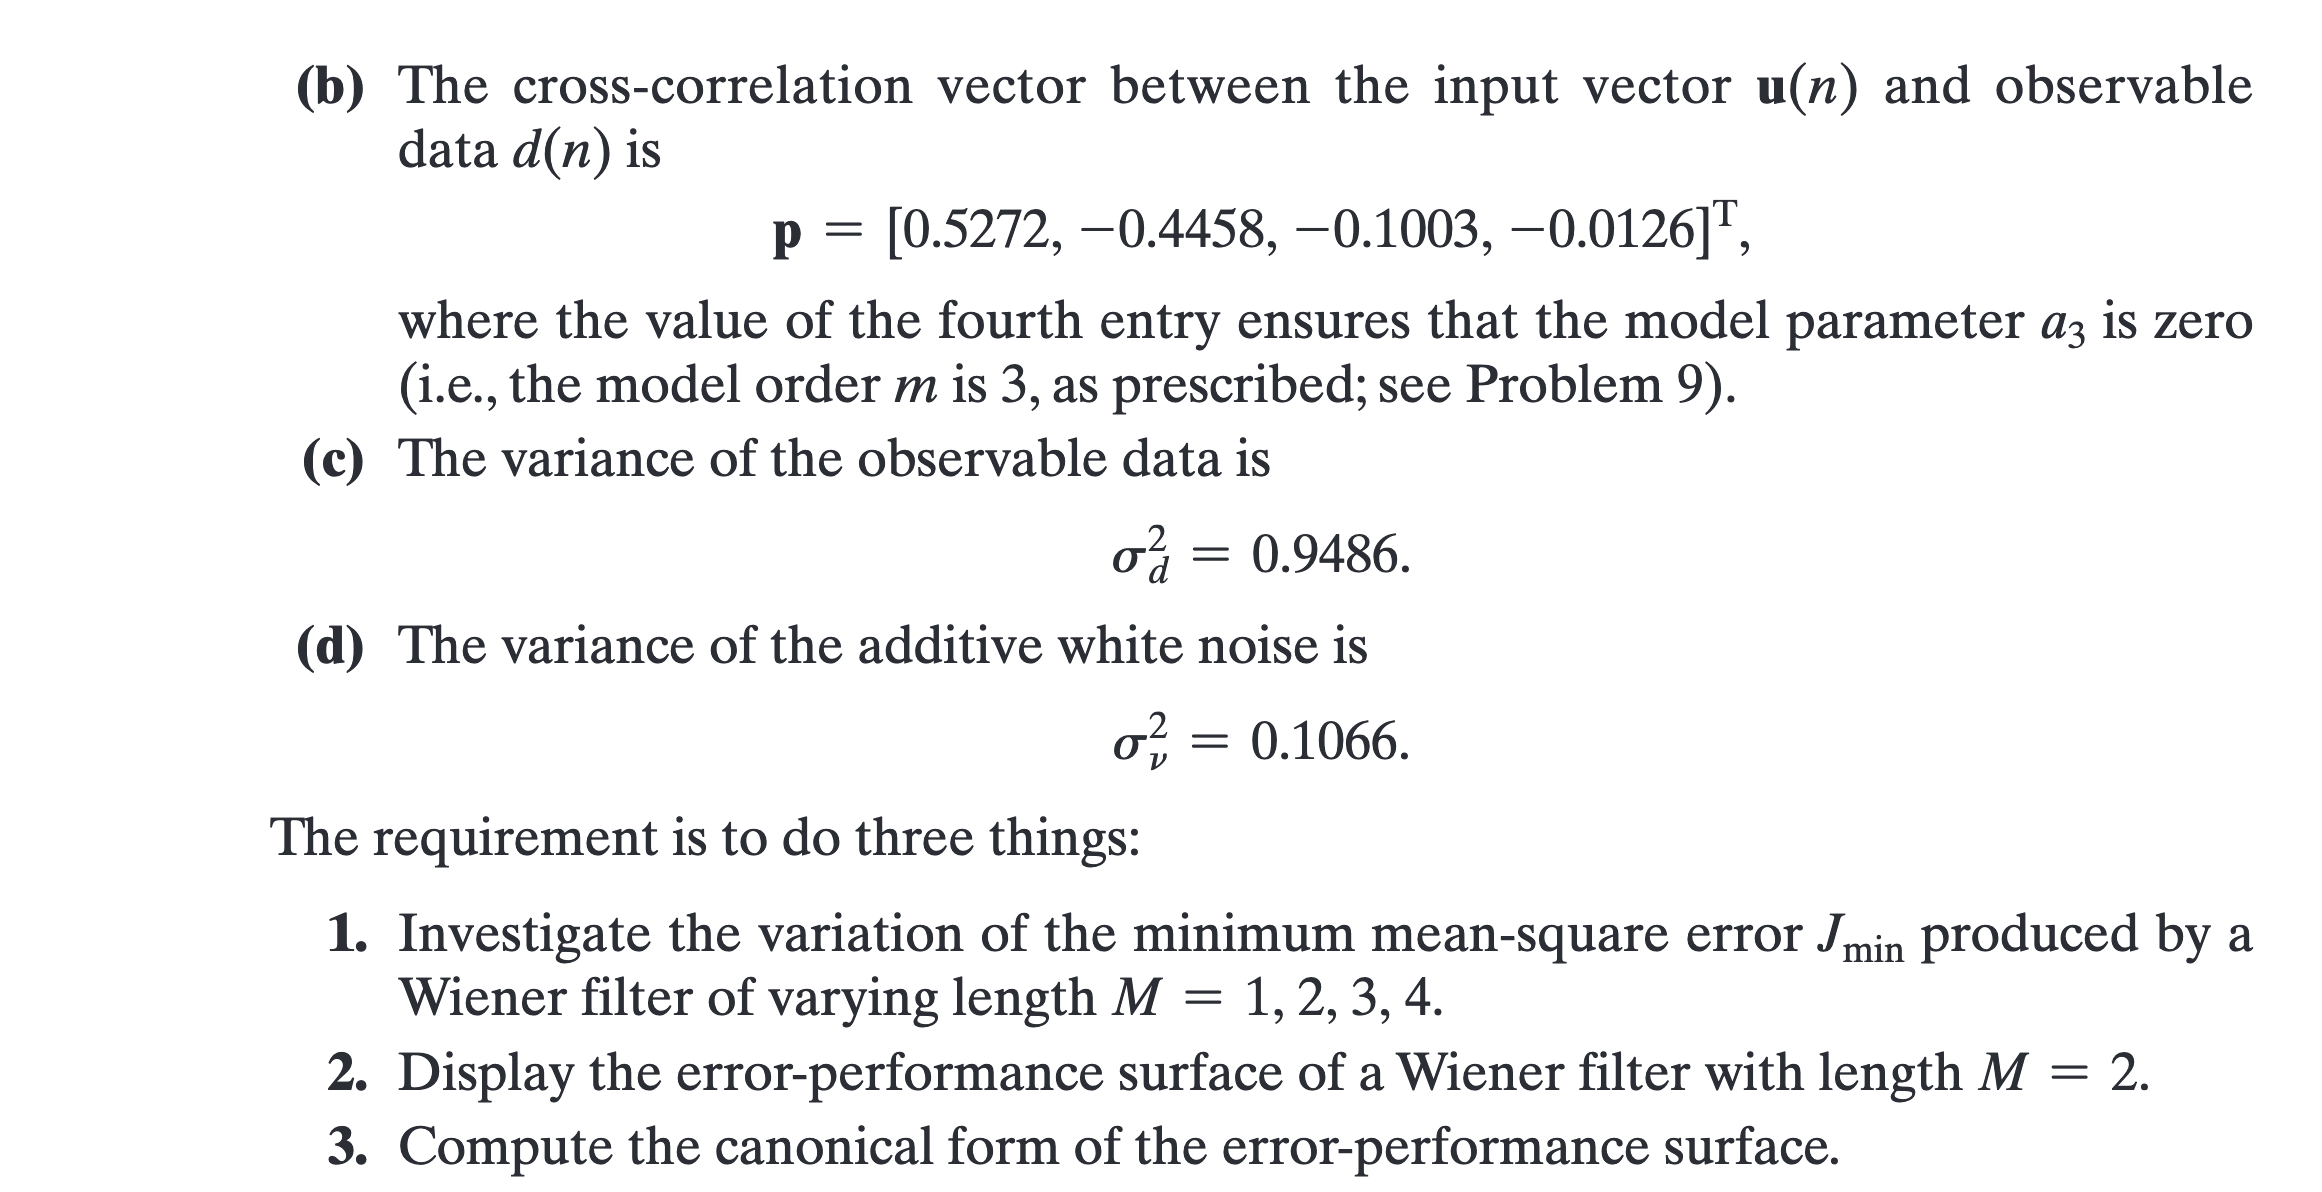

## Q1
For question 1, we want to investigate the variation of the minimum MSE $\mathbf{J}_{min}$ produced by a Wiener filter of varying length $M = 1,2,3,4$

We have with model order $M = 3$, the real-valued regression model is represented by:

$$d(n) = a_ou(n) + a_1 u(n-1) + a_2 u(n-2) + v(n)$$
where $a_k =0 $ for all $k \geq 3$, then since we have already known the correlation matrix of the input vector $\mathbf{u}(n)$ and the cross-corrrelation vector between the input vector $\mathbf{u}(n)$ and ovserrvable data $d(n)$.

Then the corresponding optimum tap-weight vector $\mathbf{w}_o$ can be calculated by the following equation:
$$\mathbf{w}_o = \mathbf{R}^{-1} \mathbf{p}$$

The MSE $J_{min}(M)$ can be calculated by 
$$J_{min} = \sigma^2_d - \mathbf{p}^H \mathbf{R}^{-1} \mathbf{p}$$

In [1]:
import numpy as np

# Known correlation matrix R_4 and the cross-correlation vector p
R_4 = np.array([
    [1.1, 0.5, 0.1, -0.05],
    [0.5, 1.1, 0.5, 0.1],
    [0.1, 0.5, 1.1, 0.5],
    [-0.05, 0.1, 1.5, 1.1]
])

sigma_d_squared = 0.9486

p = np.array([0.5272, -0.4458, -0.1003, -0.0126])

# Choose the order of the model
M = 1
R = R_4[:M, :M]   # use the M columns and rows of coorelation matrix 
p_M = p[:M]      # use the first M elements of cross-correlation vector

w_o = np.linalg.pinv(R) * p_M

# To store w_o and J_min for different model orders M = 1, 2, 3, 4
w_o_results = {}
J_min_results = {}

# Calculate w_o for each model order M
for M in range(1, 5):
    R = R_4[:M, :M]
    p_M = p[:M]
    R_inv = np.linalg.inv(R)
    w_o = R_inv @ p_M
    w_o_results[f'M={M}'] = w_o
    J_min = sigma_d_squared - p_M.T@ R_inv @ p_M 
    J_min_results[f'M={M}'] = J_min



In [2]:
w_o_results

{'M=1': array([0.47927273]),
 'M=2': array([ 0.83627083, -0.78539583]),
 'M=3': array([ 0.87191463, -0.91269512,  0.24441463]),
 'M=4': array([ 0.8471786 , -1.00545526,  0.61810548, -0.72441251])}

In [3]:
J_min_results

{'M=1': 0.6959274181818182,
 'M=2': 0.15758855416666673,
 'M=3': 0.10656190731707338,
 'M=4': 0.10660387023680429}

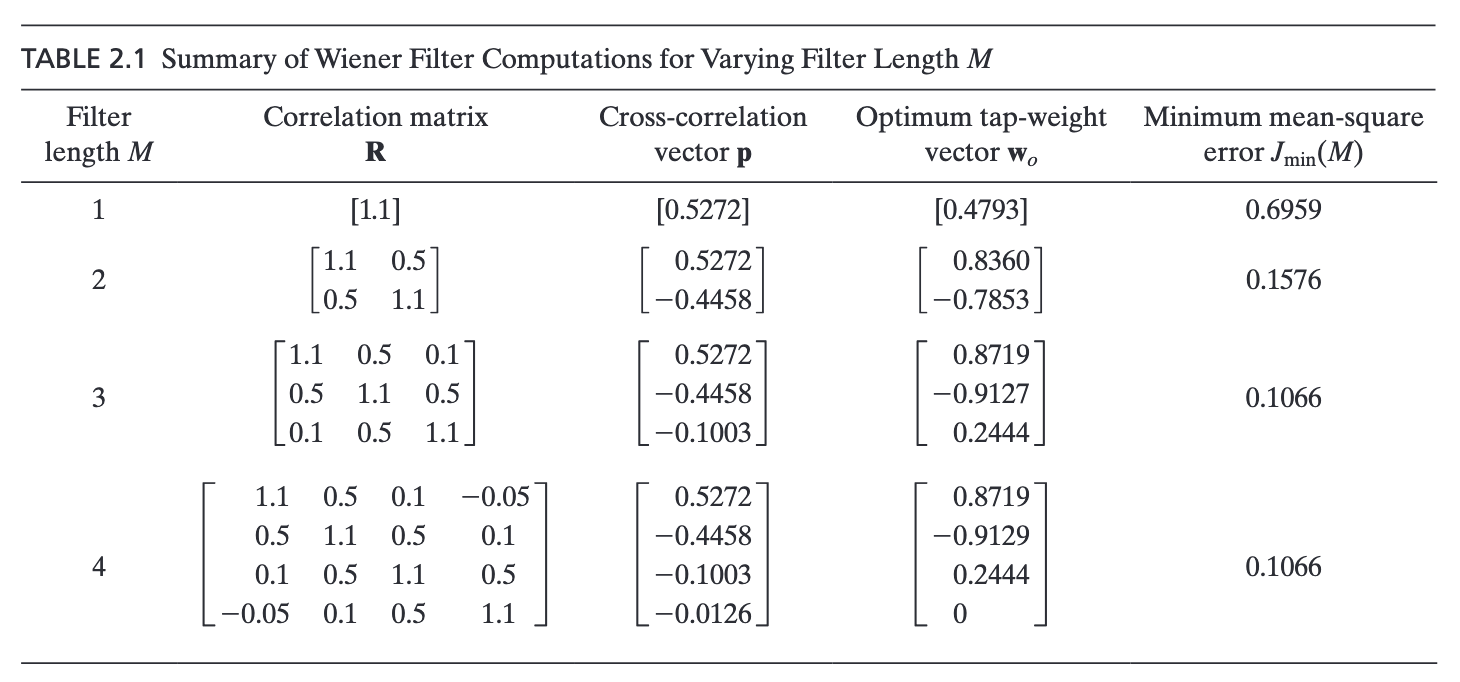

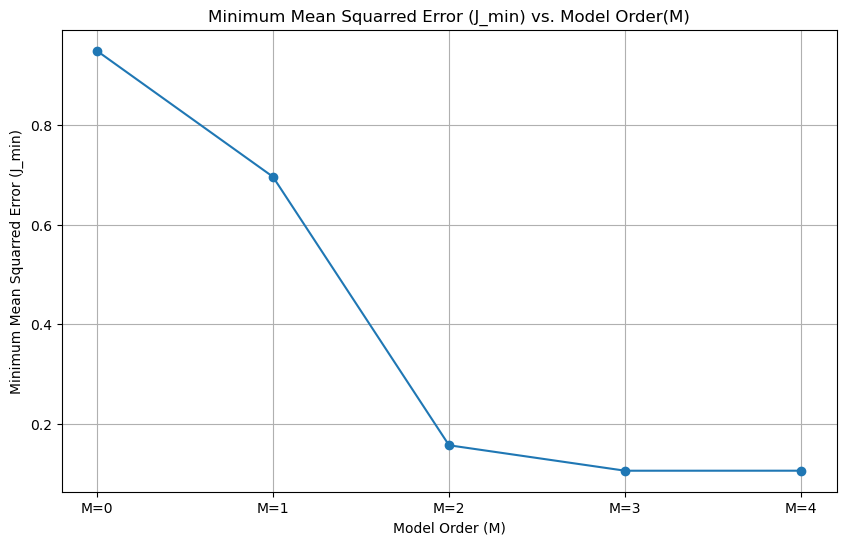

In [4]:
import matplotlib.pyplot as plt
model_orders = list(J_min_results.keys())
J_min_values = list(J_min_results.values())
J_min_results['M=0'] = sigma_d_squared
model_orders = ['M=0'] + model_orders
J_min_values = [sigma_d_squared] + J_min_values


plt.figure(figsize=(10,6))
plt.plot(range(0,5), J_min_values, marker='o')
plt.title('Minimum Mean Squarred Error (J_min) vs. Model Order(M)')
plt.xlabel('Model Order (M)')
plt.ylabel('Minimum Mean Squarred Error (J_min)')
plt.xticks(range(0,5), model_orders)
plt.grid(True)
plt.show()

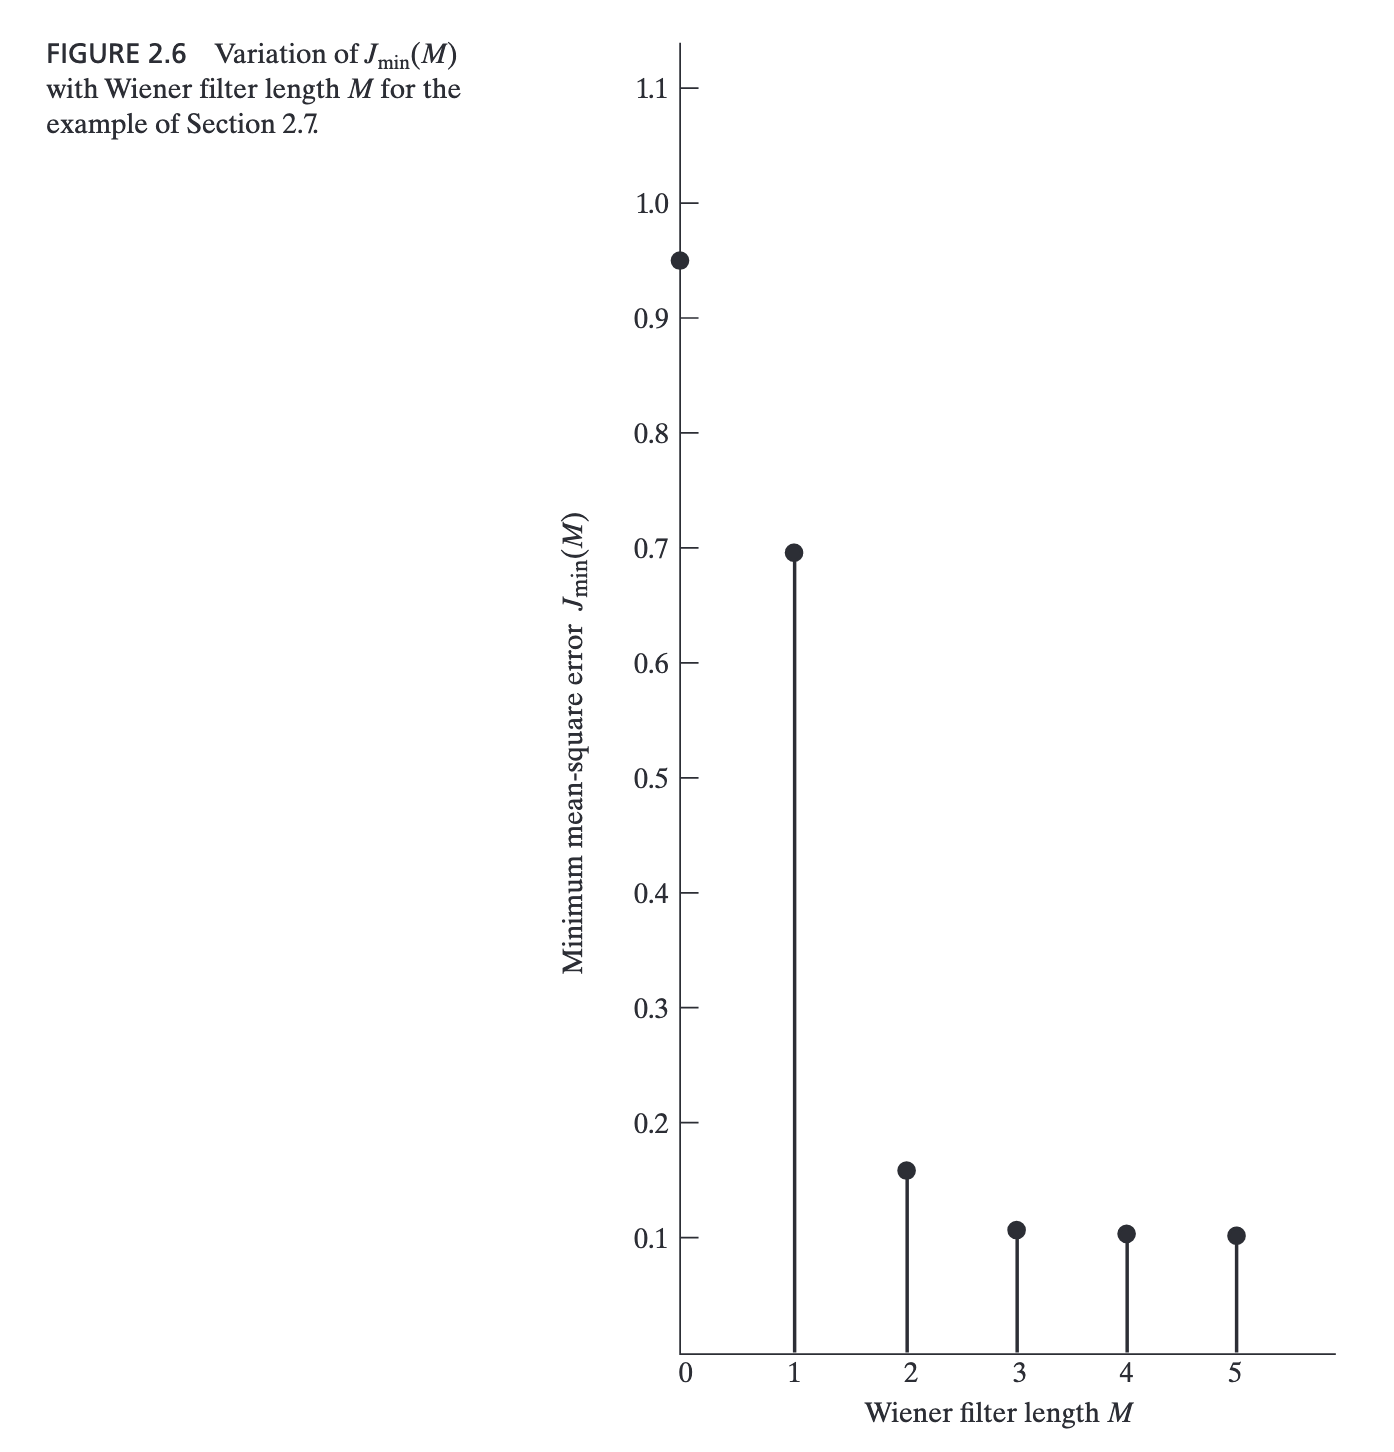

## Error-performance surface
For the filter length $M=2$, the dependence of the MSE on the 2-by-1 tap-weight vector $\mathbf{w}$ is defined as following equation:
$$J(\mathbf{w}) = \sigma_d^2 - \mathbf{w}^H \mathbf{p} - \mathbf{p}^H \mathbf{w} + \mathbf{w}^H \mathbf{R} \mathbf{w}$$

In our case, it can be rewritten as:
$$J(w_0, w_1) = 0.9486 - 2[0.5272, -0.4458][w_0,w_1]^T + [w_0,w_1][1.1, 0.5;0.5, 1.1][w_0, w_1]^T = 0.9486 - 1.0544w_0 + 0.8961w_1 + w_0 w_1 + 1.1(w_0^2 + w_1^2)$$

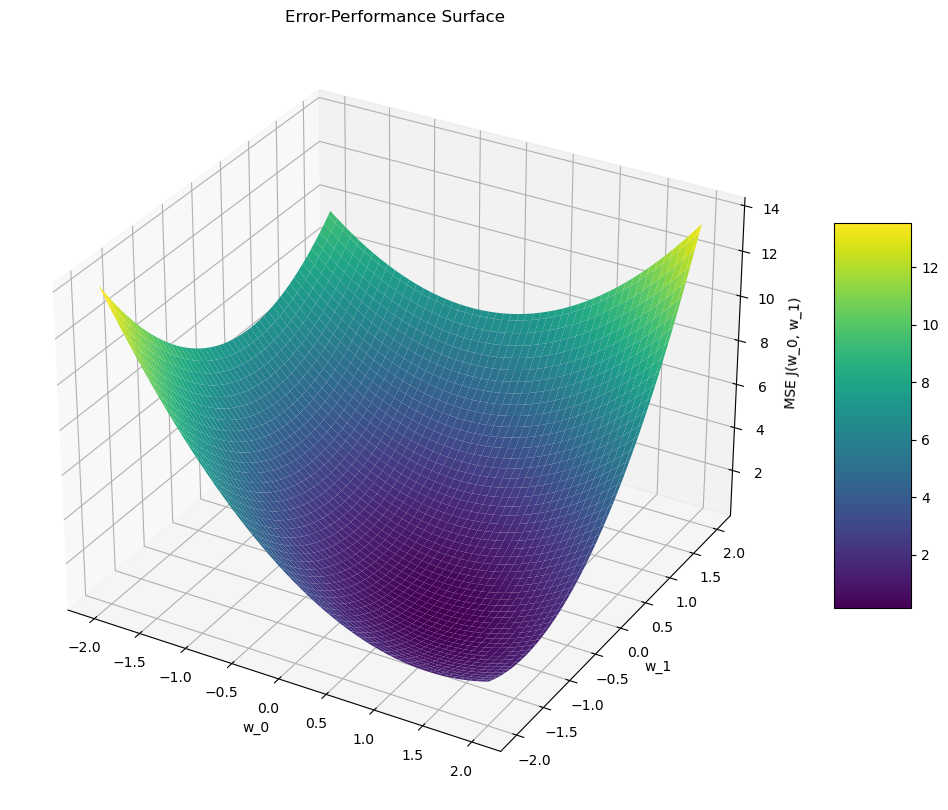

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Define the MSE function J(w_0,w_1)
def J(w_0,w_1):
    return (0.9486 - 1.0544 * w_0 + 0.8961 * w_1 + w_0 * w_1 + 1.1*(w_0**2 + w_1**2))

# Create a grid of values for w_0 and w_1
w_0 = np.linspace(-2, 2, 100)
w_1 = np.linspace(-2, 2, 100)
w_0, w_1 = np.meshgrid(w_0, w_1)
J_vals = J(w_0, w_1)

# Create the plot
fig = plt.figure(figsize = (14,10))
ax = fig.add_subplot(111, projection = '3d')

# Plot the surface
surf = ax.plot_surface(w_0, w_1, J_vals, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('w_0')
ax.set_ylabel('w_1')
ax.set_zlabel('MSE J(w_0, w_1)')
ax.set_title('Error-Performance Surface')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()